In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import random
import pandas as pd
%matplotlib inline

# Задание 1

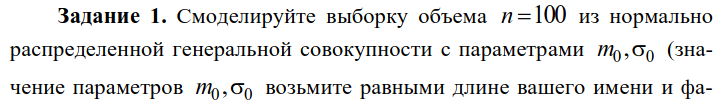

![Снимок экрана от 2024-10-12 21-24-39.png](<attachment:Снимок экрана от 2024-10-12 21-24-39.png>)
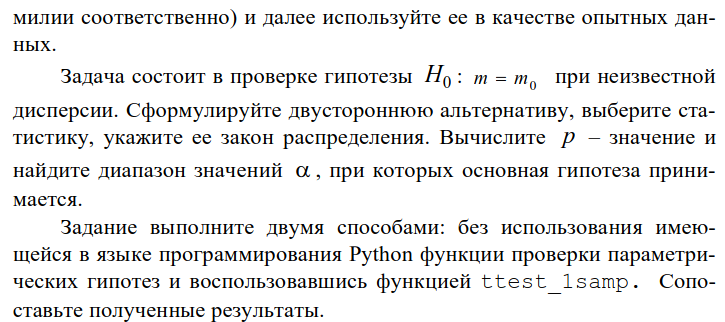

In [2]:
n = 100
m_0 = 7
sigma_0 = 8

X = np.random.normal(m_0, sigma_0, size=n)# Выборка
W = (np.mean(X) - m_0) / np.sqrt(np.var(X, ddof=1) / n)# Статистика
P = 2 * min(sts.t.cdf(W, df=n - 1), 1 - sts.t.cdf(W, df=n - 1) ) # p no формуле
wl, pl = sts.ttest_1samp(X, m_0, axis = 0, nan_policy='propagate')# p используя ttest_1samp
print ("P используя ttest_1samp", pl)
print ("P по формуле", P)
print ("гипотеза принимается при всех alpha < ", P)

P используя ttest_1samp 0.3303706766313289
P по формуле 0.3303706766313289
гипотеза принимается при всех alpha <  0.3303706766313289


# Задание 2

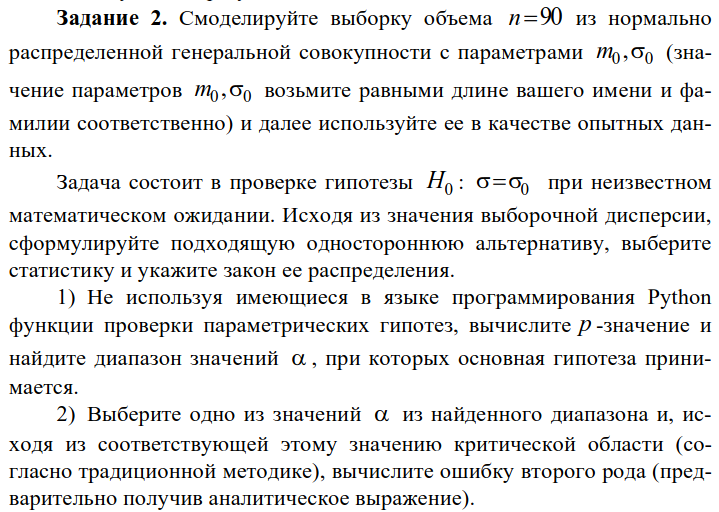

### 1-й Пункт

In [3]:
n = 90
m_0 = 7
sigma_0 = 8
side = False

X = np.random.normal(m_0, sigma_0, size=n)# Выборка
S = np.std(X)

V = np.var(X, ddof=1) / ((sigma_0 ** 2) / (n - 1))# Статистика
if(S > sigma_0):
    P = sts.chi(n-1).cdf(V)
else:
    P = 1 - sts.chi(n-1).cdf(V)
print ("Гипотеза принимается при всех alpha < ", P)

Гипотеза принимается при всех alpha <  1.0


### 2-й Пункт

In [4]:
alfa = np.random.uniform(0.0005, P)

if round(S) == sigma_0:# Проверяем, равно ли округленное стандартное отклонение выборки
    s = sigma_0 + 1 # Увеличиваем sr, чтобы избежать деления на ноль
else:
    s = round(S) # Устанавливаем sr равным округленному стандартному отклонению
print('H1: 0 =', s)

if sigma_0 < S:
    st = sts.chi2(n - 1).ppf(1 - alfa) # Критическая точка для верхней области
    # Вычисление ошибки второго рода
    mistake2 = sts.chi2(n - 1).cdf((sigma_0 / s) ** 2 * st)
else:
    st = sts.chi2(n - 1).ppf(alfa) # Критическая точка для нижней области
    # Вычисление ошибки второго рода
    mistake2 = 1 - sts.chi2(n - 1).cdf((sigma_0 / s) ** 2 * st)
print('Ошибка 2-го рода = ', mistake2)

H1: 0 = 9
Ошибка 2-го рода =  0.09049286614559623


# Задание 3

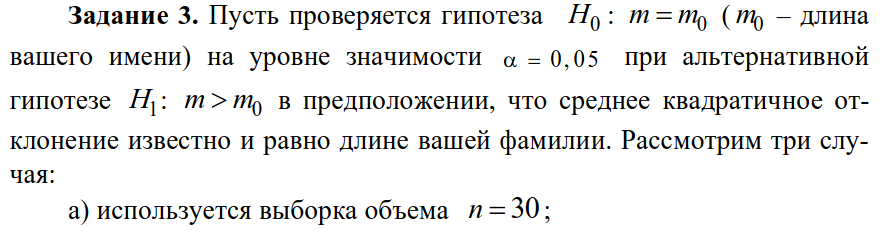
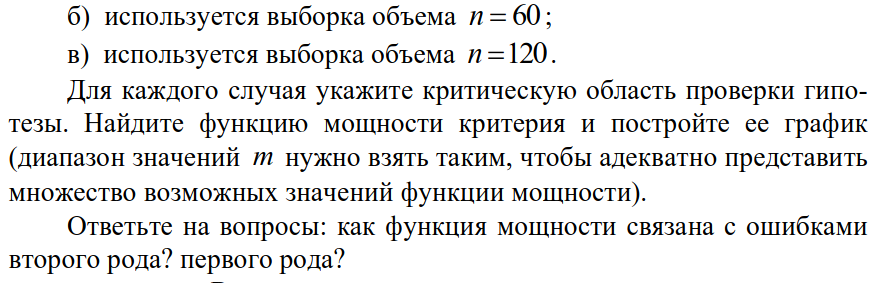

при n=30 критическая область - (1.64485, inf)
при n=60 критическая область - (1.64485, inf)
при n=120 критическая область - (1.64485, inf)


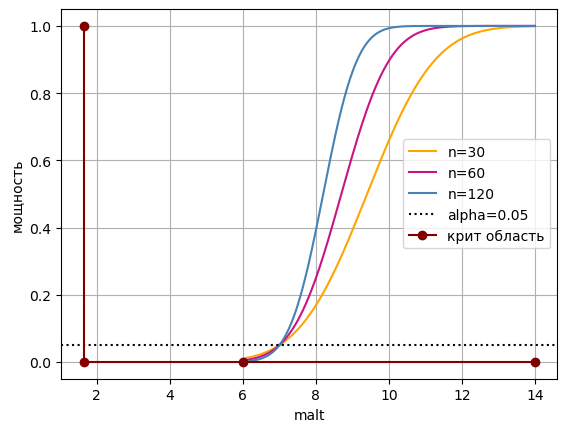

In [5]:
N = [30, 60, 120]    # Объемы выборок 
m0 = 7
sigma_0 = 8
alpha = 0.05

colors = ['#FFA500', '#C71585', '#4682B4']
for n in N:
    col = random.choice(colors)
    colors.remove(col)
    
    X = np.random.normal(m0, sigma_0, n)    # Генерация выборки
    st = sts.norm.ppf(1 - alpha)    # Критическое значение
    
    spam = np.linspace(6, 14, 200)      # Определяем диапазон альтернативных значений математического ожидания
    M = 1 - sts.norm(spam, sigma_0 / np.sqrt(n)).cdf(st * sigma_0 / np.sqrt(n) + m0)    # Мощность

    plt.plot(spam, M, label=f'n={n}', color=col)
    print(f"при n={n} критическая область - ({round(st, 5)}, inf)")
plt.grid()
plt.axhline(y=alpha, color='black', linestyle='dotted', label='alpha=0.05')     # Уровень значимости
plt.plot([st, st, 6, 14], [1, 0, 0, 0], '-o', label='крит область', color='#800000')
plt.legend(loc='best')
plt.xlabel('malt')
plt.ylabel('мощность')
plt.show()

# Задание 4

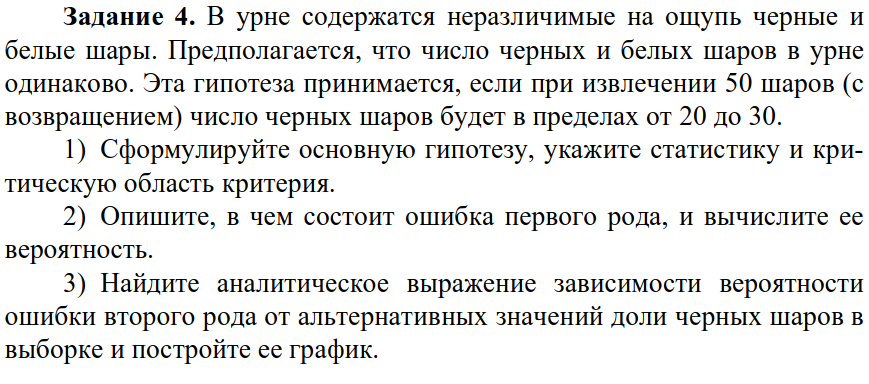

ошибка первого рода = 0.16


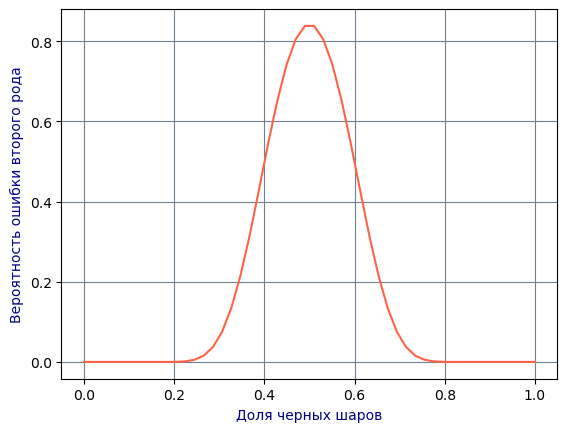

In [6]:
from turtle import color

n = 50
p = 0.5
q = 1 - p
alf = 0.4
betta = 0.6
alt = np.linspace(0.0001, 0.9999, 50)#альтернативные значения доли черных шаров в выборке
mistake = (sts.norm.cdf((alf - p) / np.sqrt(p * q/ 50)) + (1 -
sts.norm.cdf((betta - p) / np.sqrt(p * q / 50))))#ошибка первого рода
print ("ошибка первого рода =", round(mistake, 2))
mistake2 = (sts.norm.cdf((betta - alt) / np.sqrt(alt * (1 - alt) / n)) -
sts.norm.cdf( (alf - alt) / np.sqrt(alt * (1 - alt) /n)))#oшибка второго рода
plt.plot(alt, mistake2, color='#FF6347' )
plt.xlabel ('Доля черных шаров',color='#00008B')
plt.ylabel ('Вероятность ошибки второго рода' ,color='#00008B')
plt.grid (color='#708090')

# Время выполнения: 4:40